In [43]:
%matplotlib inline

In [42]:
import pandas as pd
import numpy as np

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [56]:
X = pd.DataFrame([
    ["UCLA","Arizona",80,79],
    ["UCLA","Arizona",81,70],
    ["Arizona","Delaware_St",82,74],
    ["Arizona","Delaware_St",83,81],
    ["Howard","Delaware_St",93,84],
    ["Howard","Delaware_St",80,85],
    ["Howard","Arizona",79,78]
],columns=["Team 1","Team 2", "Team 1 Score", "Team 2 Score"])
X

,Team 1,Team 2,Team 1 Score,Team 2 Score
0,UCLA,Arizona,80,79
1,UCLA,Arizona,81,70
2,Arizona,Delaware_St,82,74
3,Arizona,Delaware_St,83,81
4,Howard,Delaware_St,93,84
5,Howard,Delaware_St,80,85
6,Howard,Arizona,79,78


In [57]:
print(X.to_latex())

\begin{tabular}{lllrr}
\toprule
{} &   Team 1 &       Team 2 &  Team 1 Score &  Team 2 Score \\
\midrule
0 &     UCLA &      Arizona &            80 &            79 \\
1 &     UCLA &      Arizona &            81 &            70 \\
2 &  Arizona &  Delaware\_St &            82 &            74 \\
3 &  Arizona &  Delaware\_St &            83 &            81 \\
4 &   Howard &  Delaware\_St &            93 &            84 \\
5 &   Howard &  Delaware\_St &            80 &            85 \\
6 &   Howard &      Arizona &            79 &            78 \\
\bottomrule
\end{tabular}



In [58]:
teams = np.unique(list(X["Team 1"])+list(X["Team 2"]))
D=pd.DataFrame(np.zeros((len(teams),len(teams))),columns=teams,index=teams)
for index,row in X.iterrows():
    diff = row.loc["Team 1 Score"] - row.loc["Team 2 Score"]
    if diff > 0:
        D.loc[row.loc["Team 1"],row.loc["Team 2"]] += diff
    elif diff < 0:
        D.loc[row.loc["Team 2"],row.loc["Team 1"]] += abs(diff)
D = D.astype(int)
D

,Arizona,Delaware_St,Howard,UCLA
Arizona,0,10,0,0
Delaware_St,0,0,5,0
Howard,1,9,0,0
UCLA,12,0,0,0


In [59]:
G = nx.DiGraph()
for i in D.index:
    for j in D.columns:
        if D.loc[i,j] != 0:
            G.add_edge(i,j,width=D.loc[i,j],label=D.loc[i,j])

strict digraph "" {
	Arizona -> Delaware_St	 [label=10,
		width=10];
	Delaware_St -> Howard	 [label=5,
		width=5];
	Howard -> Arizona	 [label=1,
		width=1];
	Howard -> Delaware_St	 [label=9,
		width=9];
	UCLA -> Arizona	 [label=12,
		width=12];
}



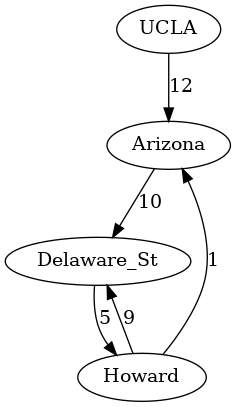

In [60]:
A = to_agraph(G)
print(A)
A.layout('dot')
A.draw('NCAA_Example.png')
draw(A)